### In this kernel I will be merging the survey data from all the previous Kaggle Surveys. From 2017 to 2020. The final dataset link is [here](https://www.kaggle.com/harveenchadha/kaggle-survey-20172020-merged-data)

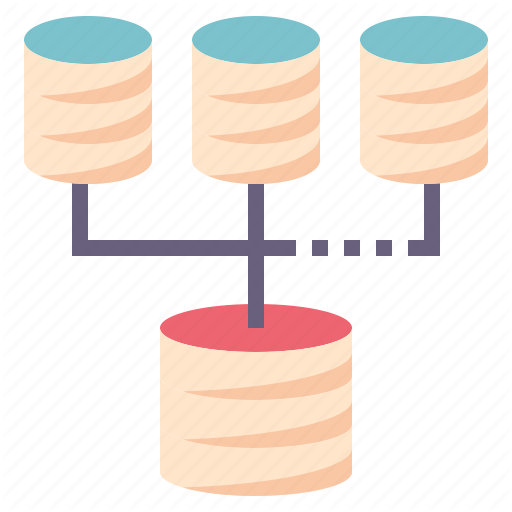

In [ ]:
## Importing Libraries ##

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
# plt.style.use('seaborn-colorblind')
# sns.color_palette(COLOR_PALETTE)
COLOR_PALETTE = 'Blues_d'
%matplotlib inline
pd.set_option('display.max_columns', 500)
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 200
#import swifter

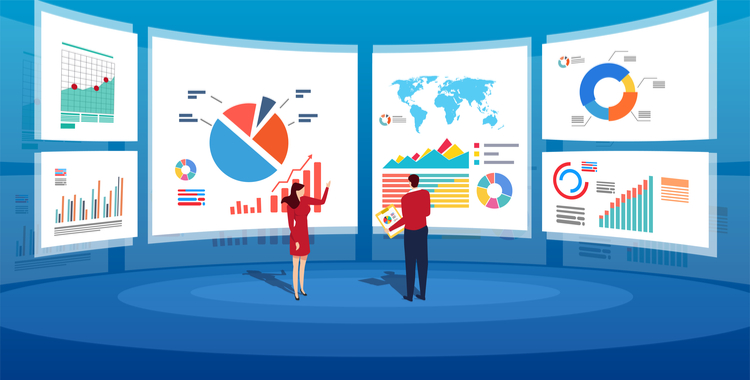

## Gathering Data

In [ ]:
mcq_2017 = pd.read_csv('../input/kaggle-survey-2017/multipleChoiceResponses.csv', encoding='latin-1')
mcq_2018 = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv')
mcq_2019 = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv')
mcq_2020 = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

### Data Preprocessing

In [ ]:
columns = ['Age', 'Gender', 'Country', 'Degree', 'Job Title', 'Company Size', 'Team Size', 'ML Status in Company','Compensation Status','Money Spent', 'Year']

In [ ]:
# 2020 should be set here
column_mapping_2020 = {'Time from Start to Finish (seconds)':'Time',
'Q1':'Age',
'Q2':'Gender',
'Q3':'Country',
'Q4':'Degree',
'Q5':'Job Title',
'Q20':'Company Size',
'Q21':'Team Size',
'Q22':'ML Status in Company',
'Q24':'Compensation Status',
'Q25':'Money Spent'
}

mcq = mcq_2020.rename(columns= column_mapping_2020)
mcq = mcq.drop([0], errors='ignore')

In [ ]:
## changing column names for better readability
column_mapping_2019 = {'Time from Start to Finish (seconds)':'Time',
'Q1':'Age',
'Q2':'Gender',
'Q3':'Country',
'Q4':'Degree',
'Q5':'Job Title',
'Q6':'Company Size',
'Q7':'Team Size',
'Q8':'ML Status in Company',
'Q10':'Compensation Status',
'Q11':'Money Spent'
}

mcq_2019 = mcq_2019.rename(columns= column_mapping_2019)
mcq_2019 = mcq_2019.drop([0], errors='ignore')



In [ ]:
## changing column names for better readability. 2018 columns are different as compared to 2019 columns
column_mapping_2018 = {'Time from Start to Finish (seconds)':'Time',
'Q2':'Age',
'Q1':'Gender',
'Q3':'Country',
'Q4':'Degree',
'Q6':'Job Title',
# 'Q8':'Team Size', ## wrong
# 'Q9':'Company Size', ## wrong                       
'Q10':'ML Status in Company', 
'Q9':'Compensation Status',
# 'Q11':'Money Spent' ## wrong
}
mcq_2018 = mcq_2018.rename(columns = column_mapping_2018)
mcq_2018 = mcq_2018.drop([0], errors='ignore')



In [ ]:
## changing column names for better readability. 2017 columns are totaly different as compared to 2019 columns
column_mapping_2017 = {'Age':'Age',
'GenderSelect':'Gender',
'Country':'Country',
'FormalEducation':'Degree',
'CurrentJobTitleSelect':'Job Title',
'EmployerSize':'Company Size',
#'EmployerSizeChange':'Team Size',
#'EmployerMLTime':'ML Status in Company',
'CompensationAmount':'Compensation Status',
'WorkMethodsFrequencyTimeSeriesAnalysis' : 'Time'
}

## Creating different dataframes to make the analysis easier
mcq_2017 = mcq_2017.rename(columns = column_mapping_2017)
mcq_2017 = mcq_2017.drop([0], errors='ignore')



Specifying year to each dataframe!

In [ ]:
mcq['Year'] = 2020
mcq_2019['Year'] = 2019
mcq_2018['Year'] = 2018
mcq_2017['Year'] = 2017

Merging all dataframes together!

In [ ]:
combined_df = pd.concat([mcq, mcq_2019, mcq_2018, mcq_2017])
combined_df = combined_df[columns]
combined_df.reset_index(drop=True)
combined_df.head()

In [ ]:
combined_df = combined_df.reset_index(drop=True)
combined_df.info()

In [ ]:
combined_df[combined_df.duplicated()] 

No duplicates found.

Making a copy of the original combined dataframe is a good practice

In [ ]:

df_copy = combined_df.copy()

## Checking Columns if they have consistent values

### 1. Age

In [ ]:
mcq['Age'].value_counts()

In [ ]:
mcq_2019['Age'].value_counts()

In [ ]:
mcq_2018['Age'].unique()

In [ ]:
mcq_2017['Age'].unique()

**Changes Required**

1. In 2018 we need to convert 80+ and 70-79 to one class i.e. 70+
2. In 2017 we need to categorize data into bins


In [ ]:

def combine_age_2018(row):
    if row == '80+':
        return '70+'
    elif row == '70-79':
        return '70+'
    else:
        return row
    

In [ ]:
combined_df['Age'] = combined_df['Age'].apply(combine_age_2018)

In [ ]:
age_ranges = mcq['Age'].unique()

def combine_age_2017(row):
    if row.Year == 2017:
        for local_age in age_ranges:
            if local_age[-1] == '+':
                
                if row.Age >= 70:
                    return '70+'
            else:
                ranges = local_age.split('-')
                try:
                    if int(row.Age) >= int(ranges[0]) and int(row.Age) <= int(ranges[1]):
                        return local_age
                except:
                    return row.Age
    else:
        return row.Age

In [ ]:
combined_df['Age'] = combined_df.apply(combine_age_2017, axis=1)

In [ ]:
combined_df['Age'].value_counts()

### 2. Gender

In [ ]:
mcq['Gender'].value_counts()

In [ ]:
mcq_2019['Gender'].value_counts()

In [ ]:
mcq_2018['Gender'].value_counts()

In [ ]:
mcq_2017['Gender'].value_counts()

**Changes Required**

1. In 2020, it is man and woman, rather than male and female
2. Make non-binary consistent from 2017

In [ ]:
def change_gender(row):
    if row.Year == 2020:
        if row['Gender'] == 'Man':
            return 'Male'
        elif row['Gender'] == 'Woman':
            return 'Female'
        else:
            return row['Gender']
        
    elif row.Year == 2017:
        if row['Gender'] == 'A different identity':
            return 'Prefer not to say'
        elif row['Gender'] == 'Non-binary, genderqueer, or gender non-conforming':
            return 'Nonbinary'
        else:
            return row['Gender']
    else:
        return row['Gender']

In [ ]:
combined_df['Gender'] = combined_df.apply(change_gender, axis=1)

In [ ]:
combined_df['Gender'].value_counts()

## 3. Degree

In [ ]:
mcq['Degree'].value_counts()

In [ ]:
mcq_2019['Degree'].value_counts()

In [ ]:
mcq_2018['Degree'].value_counts()

In [ ]:
mcq_2017['Degree'].value_counts()

**Changes Required**

1. Make the labels consistent for 2017 data

In [ ]:
def degree_change(row):
    if row.Year == 2017:
        if row.Degree == 'I did not complete any formal education past high school':
            return 'No formal education past high school'
        elif row.Degree == 'Master\'s degree':
            return 'Master’s degree'
        elif row.Degree == 'Bachelor\'s degree':
            return 'Bachelor’s degree'
        elif row.Degree == 'Some college/university study without earning a bachelor\'s degree':
            return 'Some college/university study without earning a bachelor’s degree'
        else:
            return row.Degree
    else:
        return row.Degree

In [ ]:
combined_df['Degree'] = combined_df.apply(degree_change, axis=1)

In [ ]:
combined_df['Degree'].value_counts()

## 4. Job Title

In [ ]:
mcq['Job Title'].value_counts()

In [ ]:
mcq_2019['Job Title'].value_counts()

In [ ]:
mcq_2018['Job Title'].value_counts()

In [ ]:
mcq_2017['Job Title'].value_counts()

**No changes required**

## 5. Company Size

In [ ]:
mcq['Company Size'].value_counts()

In [ ]:
mcq_2019['Company Size'].value_counts()

In [ ]:
mcq_2017['Company Size'].value_counts()

**Changes Required:**

2019: '> 10,000 employees' to '10,000 or more employees'

2018: Not present

2017: Company Size (Same categories)


In [ ]:
def change_company_size(row):
    if row.Year == 2019:
        if row['Company Size'] == '> 10,000 employees':
            return '10,000 or more employees'
        else:
            return row['Company Size']
    elif row.Year == 2017:
        if row['Company Size'] == '10 to 19 employees' or row['Company Size'] == 'Fewer than 10 employees':
            return '0-49 employees'
        elif row['Company Size'] == '20 to 99 employees' or row['Company Size'] == '100 to 499 employees':
            return '50-249 employees'
        elif row['Company Size'] == '500 to 999 employees':
            return '250-999 employees'
        elif row['Company Size'] == '1,000 to 4,999 employees' or row['Company Size'] == '5,000 to 9,999 employees':
            return '1000-9,999 employees'
        elif row['Company Size'] == '10,000 or more employees':
            return '10,000 or more employees'
        else:
            return row['Company Size']
    else:
        return row['Company Size']

In [ ]:
combined_df['Company Size'] = combined_df.apply(change_company_size, axis=1)

In [ ]:
combined_df['Company Size'].value_counts()

## 6. Individuals for Data Science

In [ ]:
mcq['Team Size'].value_counts()

In [ ]:
mcq_2019['Team Size'].value_counts()

**No Changes Required**

## 7. ML Status in Company

In [ ]:
mcq['ML Status in Company'].value_counts()

In [ ]:
mcq_2019['ML Status in Company'].value_counts()

In [ ]:
mcq_2018['ML Status in Company'].value_counts()

**No changes required**

## 8. Compensation Status

In [ ]:
compensation_status = mcq['Compensation Status'].value_counts().reset_index().sort_values(by='index')
compensation_status_2= compensation_status['index'].str.split('-', expand=True)
final_compensation = pd.concat([compensation_status, compensation_status_2], axis =1)
final_compensation.sort_values(by='index').reset_index(drop=True)

In [ ]:
mcq_2019['Compensation Status'].value_counts().reset_index().sort_values(by='index').reset_index(drop=True)

In [ ]:
mcq_2018['Compensation Status'].value_counts().reset_index().sort_values(by='index').reset_index(drop=True)

In [ ]:
mcq_2017['Compensation Status'].unique()

**Changes required:**

1. Setting Bins according to 2018 data as we can merge from 2019 and 2020.
2. Dividing 2017 data into bins

In [ ]:
dict_salary_2018_mapping = {'0-10,000':'0-10,000','10-20,000': '10,001-20,000', '20-30,000': '20,001-30,000', '30-40,000':'30,000-39,999',
                           '40-50,000':'40,000-49,999', '50-60,000':'50,000-59,999', '60-70,000':'60,000-69,999',
                           '70-80,000':'70,000-79,999', '80-90,000':'80,000-89,999', '90-100,000':'90,000-99,999',
                           '100-125,000':'100,000-124,999', '125-150,000':'125,000-149,999', '150-200,000': '150,000-199,999',
                           '200-250,000':'200,000-249,999', '250-300,000': '250,000-299,999', '300-400,000':'300,000-500,000',
                           '400-500,000':'300,000-500,000','500,000+':'> $500,000', 'I do not wish to disclose my approximate yearly compensation':'Cant Disclose',
                           np.nan:np.nan}

len(dict_salary_2018_mapping)

In [ ]:
def change_salary(row):
    if row.Year == 2019 or row.Year == 2020:
        if row['Compensation Status']=='$0-999' or row['Compensation Status'] == '1,000-1,999' or row['Compensation Status'] == '2,000-2,999' \
            or row['Compensation Status']=='3,000-3,999' or row['Compensation Status']=='4,000-4,999' or row['Compensation Status']=='5,000-7,499' or row['Compensation Status']=='7,500-9,999':
            return '0-10,000'
        elif row['Compensation Status'] == '10,000-14,999' or row['Compensation Status'] == '15,000-19,999':
            return '10,001-20,000'
        elif row['Compensation Status'] == '20,000-24,999' or row['Compensation Status'] == '25,000-29,999':
            return '20,001-30,000'
        else:
            return row['Compensation Status']

    elif row.Year == 2018:
        #if not row['Compensation Status'].isna():
        value_to_return = dict_salary_2018_mapping[row['Compensation Status']]
        return value_to_return
    else:
        return row['Compensation Status']

In [ ]:
combined_df['Compensation Status'] = combined_df.apply(change_salary, axis=1)

In [ ]:
list_values = list(dict_salary_2018_mapping.values())
list_values.remove(np.nan)

def change_salary_2017(row):
    if row['Year']==2017:
        for i in list_values:
            ranges = i.split('-')
            if len(ranges)==2:
                try:
                    if int(row['Compensation Status'].replace(',',''))>=int(ranges[0].replace(',','')) and int(row['Compensation Status'].replace(',','')) <= int(ranges[1].replace(',','')):
                        return i
                except:
                    return 'Cant Disclose'
            else:
                try:
                    if int(row['Compensation Status'].replace(',',''))>500000:
                        return '> $500,000'
                    else:
                        return 'Cant Disclose'
                except:
                    return 'Cant Disclose'
                #> 5,000,000, can't disclose
                
    else:
        return row['Compensation Status']

In [ ]:
mcq_2017[mcq_2017['Compensation Status'].isnull() == False].apply(change_salary_2017, axis=1)

In [ ]:

combined_df['Compensation Status'] = combined_df.apply(change_salary_2017, axis=1)

In [ ]:
combined_df['Compensation Status'].unique()

## 9. **Money Spent on Cloud Computing/ ML Products**

In [ ]:
mcq['Money Spent'].value_counts()

In [ ]:
mcq_2019['Money Spent'].value_counts()

**No Changes required**

### Generating Final File

In [ ]:
combined_df.head(1)

In [ ]:
combined_df = combined_df.reset_index()
combined_df.info()

In [ ]:
combined_df.to_csv('kaggle_survey_17_20_v2.csv', index=False)

In [ ]:
combined_df.drop_duplicates()

In [ ]:
import os
os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'kaggle_survey_17_20_v2.csv')